### Задача 1

Что выведет этот код?

Ответом на эту задачу является выведенное число, округлённое до 4го знака, дробная часть отделяется **точкой**.

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

X_data, y_data = load_breast_cancer(return_X_y=True)

print(cross_val_score(RandomForestClassifier(criterion='entropy', n_estimators=42, random_state=42), X_data, y_data, cv=3).mean())
print(round(cross_val_score(RandomForestClassifier(criterion='entropy', n_estimators=42, random_state=42), X_data, y_data, cv=3).mean(), 4))

0.964847303444
0.9648


### Задача 2

Напишите свою функцию определения качества модели по следующей метрике: максимальный precision, при условии, что $precision < 1.5 * recall$ и $recall > 0.5$ и определите наилучшее её значение, перебирая гиперпараметры по предложенной сетке

Ответом на эту задачу является максимальное значение качества по предложенной метрике, округлённое до 4го знака, дробная часть отделяется **точкой**.

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_score, recall_score, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer

param_grid = {
    'n_estimators': [10, 20, 30, 40, 50],
    'max_depth': [None, 5, 10, 15, 20],
    'criterion': ['entropy', 'gini']
}

X_data, y_data = load_breast_cancer(return_X_y=True)

estimator = RandomForestClassifier(random_state=42)

print('Accuracy best params and score')
result = GridSearchCV(estimator, param_grid, cv=3, scoring='accuracy').fit(X_data, y_data)
print('\tParams:', result.best_params_)
print('\tScore:', result.best_score_)

Accuracy best params and score
	Params: {'criterion': 'entropy', 'max_depth': None, 'n_estimators': 50}
	Score: 0.964850615114


In [20]:
def my_score_func(y_true, y_pred):
    if (precision_score(y_true, y_pred) < 1.5*recall_score(y_true, y_pred)) & (recall_score(y_true, y_pred) > 0.5): 
        return precision_score(y_true, y_pred)
    else:
        return 0

scorer = make_scorer(my_score_func, greater_is_better=True) # TODO

print('Custom loss best params and score')
result = GridSearchCV(estimator, param_grid, cv=3, scoring=scorer).fit(X_data, y_data)
print('\tParams:', result.best_params_)
print('\tScore:', result.best_score_)

Custom loss best params and score
	Params: {'criterion': 'gini', 'max_depth': None, 'n_estimators': 10}
	Score: 0.968819611066


In [21]:
print('Rouned score: ', round(result.best_score_, 4))

Rouned score:  0.9688


### Задача 3

Какова минимальная сторона квадрата с параллельными осям сторонами, содержащего все точки из $X$? 

Ответом на эту задачу является число, округлённое до 2го знака, дробная часть отделяется точкой.

In [32]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import seaborn as sns
%pylab inline
data = load_breast_cancer()
X = data.data[:, :2]

Populating the interactive namespace from numpy and matplotlib


In [29]:
df = pd.DataFrame(X)
df.head()

,0,1
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34


In [30]:
df.describe()

,0,1
count,569.000000,569.000000
mean,14.127292,19.289649
std,3.524049,4.301036
min,6.981000,9.710000
25%,11.700000,16.170000
50%,13.370000,18.840000
75%,15.780000,21.800000
max,28.110000,39.280000


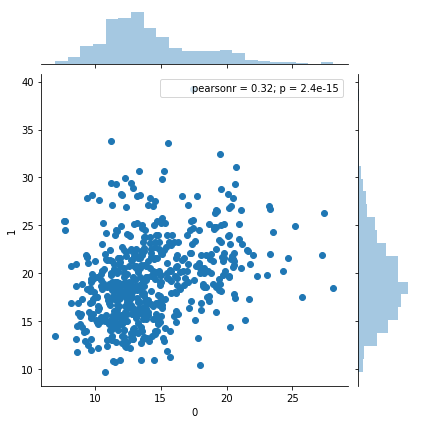

In [36]:
sns_plot = sns.jointplot(df[0], df[1])

In [23]:
X[0:5, :]

array([[ 17.99,  10.38],
       [ 20.57,  17.77],
       [ 19.69,  21.25],
       [ 11.42,  20.38],
       [ 20.29,  14.34]])

In [24]:
X[:,0].max() - X[:,0].min()

21.128999999999998

In [25]:
X[:,1].max() - X[:,1].min()

29.57

**Ответ:** _29.57_

In [69]:
import math
def positive_experiments(k, n):
    if k <= n:
        return (math.factorial(n)/(math.factorial(k)*math.factorial(n-k)))
    else: 0

def calc_probe(a1, a2, number):
    if (0 < a1 <= number) & (0 < a2 <= number):
        quantity = list(range(a1, a2+1))
        summ = 0
        for i in quantity:
            summ = summ + positive_experiments(i, number)
        return summ*(0.5**number)
    else: return "Неправильные параметры"


In [74]:
#a = positive_experiments(8,10)
#print(a)
probability = calc_probe(53,100,100)
print(probability,"\nrounded: ", round(probability, 3))

0.3086497067946261 
rounded:  0.309


In [76]:
calc_probe(1,52,100) + probability

1.0